In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
facebook = pd.read_excel('MostSubscribers.xlsx', 'Facebook')
instagram = pd.read_excel('MostSubscribers.xlsx', 'Instagram')
twitter = pd.read_excel('MostSubscribers.xlsx', 'Twitter')
tiktok = pd.read_excel('MostSubscribers.xlsx', 'TikTok')
youtube = pd.read_excel('MostSubscribers.xlsx', 'YouTube')

In [3]:
[facebook.head(), instagram.head(), twitter.head(), youtube.head(), tiktok.head()]

[   Rank           PageName  Followers(millions)            Description  \
 0     1       Facebook App                  214  Social media platform   
 1     2            Samsung                  161   Product and services   
 2     3  Cristiano Ronaldo                  150        Football player   
 3     4           Mr. Bean                  128    Fictional character   
 4     5               CGTN                  117            State media   
 
            Country  
 0    United States  
 1      South Korea  
 2         Portugal  
 3   United Kingdom  
 4            China  ,
    Rank      Username              Owner  Followers(millions)  \
 0     1    @instagram          Instagram                  424   
 1     2    @cristiano  Cristiano Ronaldo                  348   
 2     3      @therock     Dwayne Johnson                  271   
 3     4  @kyliejenner       Kylie Jenner                  271   
 4     5     @leomessi       Lionel Messi                  269   
 
                 

In [4]:
joined_data = pd.concat([facebook[['PageName', 'Followers(millions)']].rename(columns={'PageName':'Name'}),
          instagram[['Owner', 'Followers(millions)']].rename(columns={'Owner':'Name'}),
          twitter[['Owner', 'Followers(millions)']].rename(columns={'Owner':'Name'}),
          youtube[['Channel', 'Subscribers(millions)']].rename(columns={'Channel':'Name',
                                                        'Subscribers(millions)':'Followers(millions)'}),
          tiktok[['Owner', 'Followers(millions)']].rename(columns={'Owner':'Name'})]
         ).reset_index(drop=True)
joined_data

,Name,Followers(millions)
0,Facebook App,214.0
1,Samsung,161.0
2,Cristiano Ronaldo,150.0
3,Mr. Bean,128.0
4,CGTN,117.0
...,...,...
245,Savannah LaBrant,29.1
246,Darian Rojas,28.8
247,Liza Anokhina,28.7
248,Liza Koshy,28.6


In [5]:
total_follow = joined_data.groupby('Name')['Followers(millions)'].sum().reset_index()
total_follow

,Name,Followers(millions)
0,5-Minute Crafts,186.7
1,Aaj Tak,47.6
2,Addison Rae,84.6
3,Adele,68.0
4,Akshay Kumar,42.3
...,...,...
192,Zee Music Company,77.1
193,Zee TV,59.2
194,Zendaya,109.0
195,elrubiusOMG,40.0


In [6]:
names = np.concatenate((facebook['PageName'], instagram['Owner'], tiktok['Owner'], 
                        youtube['Channel'], twitter['Owner']))

In [7]:
from collections import Counter
name_count = Counter(joined_data['Name'])

In [8]:
namecount = pd.DataFrame.from_dict(name_count, orient='index').reset_index()
namecount = namecount.rename(columns={'index':'Name', 0:'Count'})
namecount = namecount[namecount['Count'] > 2].sort_values('Count', ascending=False).reset_index(drop=True)
namecount

,Name,Count
0,Justin Bieber,4
1,Selena Gomez,4
2,Taylor Swift,4
3,Katy Perry,4
4,Cristiano Ronaldo,3
5,Shakira,3
6,FC Barcelona,3
7,Rihanna,3
8,Neymar,3
9,UEFA Champions League,3


In [12]:
nametable = namecount.merge(total_follow, on='Name'
               ).sort_values(['Count', 'Followers(millions)'], ascending=False
               ).reset_index(drop=True
               ).rename(columns={'Followers(millions)': 'Total Followers (Millions)'})
nametable

,Name,Count,Total Followers (Millions)
0,Justin Bieber,4,466.3
1,Selena Gomez,4,450.5
2,Taylor Swift,4,388.3
3,Katy Perry,4,355.2
4,Cristiano Ronaldo,3,592.5
5,Ariana Grande,3,401.0
6,Kylie Jenner,3,346.0
7,Rihanna,3,314.0
8,Neymar,3,302.7
9,Jennifer Lopez,3,281.1


In [37]:
count3 = nametable[nametable['Count']==3].reset_index(drop=True)
count4 = nametable[nametable['Count']==4].reset_index(drop=True)

Text(0.5, 0, 'Number of Social Media')

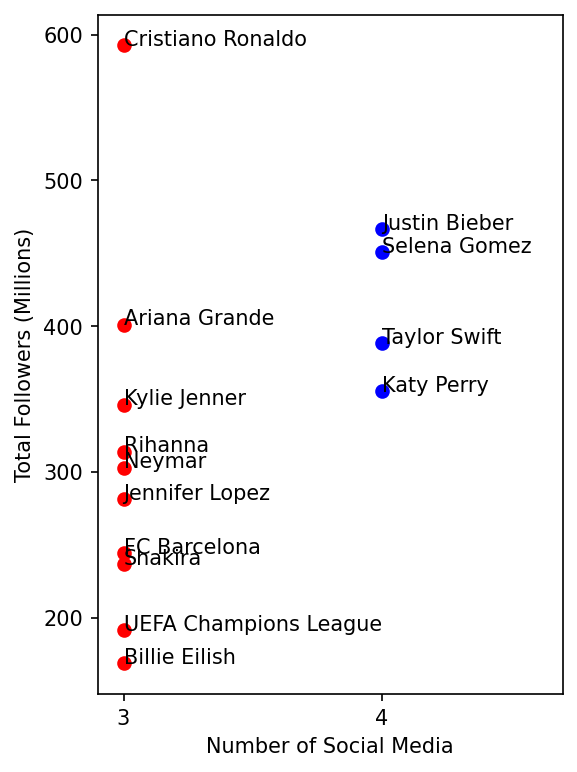

In [44]:
plt.figure(dpi=150, figsize=(4,6))
plt.scatter(count3['Count'], count3['Total Followers (Millions)'], color='r')
plt.scatter(count4['Count'], count4['Total Followers (Millions)'], color='b')
for i in range(nametable.shape[0]):
    plt.annotate(nametable['Name'][i], (nametable['Count'][i], nametable['Total Followers (Millions)'][i]))
plt.xlim(2.9, 4.7)
plt.xticks([3,4])
plt.ylabel('Total Followers (Millions)')
plt.xlabel('Number of Social Media')

In [10]:
twitter.groupby('Country')['Owner'].count()

Country
 Barbados                1
 Brazil                  1
 Canada                  2
 Colombia                1
 Europe                  1
 India                   7
 Portugal                1
 Republic of Ireland     1
 South Korea             1
 Spain                   2
 United Kingdom          2
 United States          30
Name: Owner, dtype: int64

In [35]:
nametable[nametable['Count']==3]['Count']

4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
Name: Count, dtype: int64